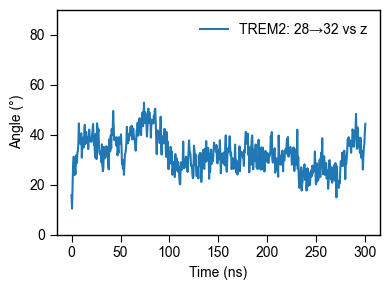

In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def angle_groups_vs_z(top, trj, id_range_A, id_range_B, step=10, absolute=True):
    """
    Angle (deg) between vector [mean_CA(A) -> mean_CA(B)] and z-axis per frame.
    id_range_A/B: (start_id, end_id), inclusive, in topology atom IDs.
    absolute=True  -> 0–90° (|dot|), typical "tilt"
    absolute=False -> 0–180°
    """
    u = mda.Universe(top, trj)

    # MDAnalysis selection for atom IDs is "bynum"; range is with '-' (not ':')
    selA = u.select_atoms("index 1305:1314 and name CA") # residue 20 proxy 
    selB = u.select_atoms("index 1365:1383 and name CA") # residue 24 proxy


    if len(selA) == 0 or len(selB) == 0:
        raise ValueError(f"Empty selection: A has {len(selA)} atoms, B has {len(selB)} atoms. "
                         "Check atom ID ranges and 'name CA' filter.")

    z = np.array([0.0, 0.0, 1.0])
    times, angles = [], []

    for ts in u.trajectory[::step]:
        A = selA.positions.mean(axis=0)
        B = selB.positions.mean(axis=0)
        v = B - A
        nv = np.linalg.norm(v)
        if nv == 0:
            ang = np.nan
        else:
            vhat = v / nv
            dot = np.dot(vhat, z)
            if absolute:
                dot = abs(dot)
            dot = np.clip(dot, -1.0, 1.0)
            ang = np.degrees(np.arccos(dot))
        times.append(u.trajectory.time * 1e-3)   # ns
        angles.append(ang)

    return np.asarray(times), np.asarray(angles)

# ---------- your group-1 example (isoform-230 WT) ----------
WT_TOP = "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_step6_6.tpr"
WT_TRJ = "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_300ns_nojump_center.xtc"

# A: 1444–1462 (CA) ~ TREM2 resid 28;  B: 1494–1503 (CA) ~ TREM2 resid 32
t, ang = angle_groups_vs_z(WT_TOP, WT_TRJ, (1444, 1462), (1494, 1503), step=10, absolute=True)

# quick plot
plt.figure(figsize=(4,3))
plt.plot(t, ang, lw=1.5, label="TREM2: 28→32 vs z")
plt.xlabel("Time (ns)")
plt.ylabel("Angle (°)")        # 0–90° with absolute=True
plt.ylim(0, 90)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


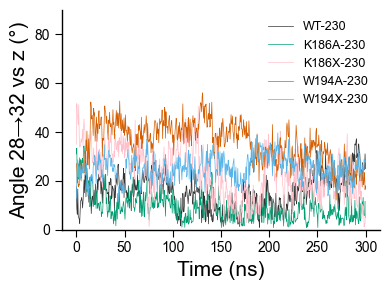

Saved figure to: /Users/k20098771/Data/Figures/TREM2_28to32_tilt_group1.jpeg


In [5]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def angle_groups_vs_z(top, trj, step=10, absolute=True):
    """
    Angle (deg) between vector [mean_CA(1444:1462) -> mean_CA(1494:1503)] and z-axis per frame.
    Uses MDAnalysis 'index' selection (0-based atom indices) with ranges 'start:end' (inclusive).
    """
    u = mda.Universe(top, trj)

    # Your specified CA groups:
    selA = u.select_atoms("index 1305:1314 and name CA")  # residue 20 proxy
    selB = u.select_atoms("index 1365:1383 and name CA")  # residue 24 proxy

    if len(selA) == 0 or len(selB) == 0:
        raise ValueError(f"Empty selection: A={len(selA)} atoms, B={len(selB)} atoms. "
                         "Check atom index ranges and 'name CA'.")

    z = np.array([0.0, 0.0, 1.0])
    times, angles = [], []

    for ts in u.trajectory[::step]:
        A = selA.positions.mean(axis=0)
        B = selB.positions.mean(axis=0)
        v = B - A
        nv = np.linalg.norm(v)
        if nv == 0:
            ang = np.nan
        else:
            vhat = v / nv
            dot = np.dot(vhat, z)
            if absolute:
                dot = abs(dot)  # 0–90°
            dot = np.clip(dot, -1.0, 1.0)
            ang = np.degrees(np.arccos(dot))
        times.append(u.trajectory.time * 1e-3)   # ns
        angles.append(ang)

    return np.asarray(times), np.asarray(angles)

# -------------------------
# Paths for Group 1 (isoform-230)
# -------------------------
WT_TOP   = "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_step6_6.tpr"
WT_TRJ   = "/Users/k20098771/Data/2023/CGtoAA/AF_CGtoAA_200us_300ns_nojump_center.xtc"

K26A_TOP = "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step6_6.tpr"
K26A_TRJ = "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26A_step7_300ns_centered.xtc"

K26X_TOP = "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26X_step6_6.tpr"
K26X_TRJ = "/Users/k20098771/Data/2024/CGtoAA/Group_1/K26X_step7_300ns_centered.xtc"

W34A_TOP = "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34A_step6_6.tpr"
W34A_TRJ = "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34A_step7_300ns_centered.xtc"

W34X_TOP = "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34X_step6_6.tpr"
W34X_TRJ = "/Users/k20098771/Data/2024/CGtoAA/Group_1/W34X_step7_300ns_centered.xtc"

# -------------------------
# Compute series for all five
# -------------------------
step = 10
t_wt,   a_wt   = angle_groups_vs_z(WT_TOP,   WT_TRJ,   step=step, absolute=True)
t_k26a, a_k26a = angle_groups_vs_z(K26A_TOP, K26A_TRJ, step=step, absolute=True)
t_k26x, a_k26x = angle_groups_vs_z(K26X_TOP, K26X_TRJ, step=step, absolute=True)
t_w34a, a_w34a = angle_groups_vs_z(W34A_TOP, W34A_TRJ, step=step, absolute=True)
t_w34x, a_w34x = angle_groups_vs_z(W34X_TOP, W34X_TRJ, step=step, absolute=True)

# -------------------------
# Plot styling (Nature-like, consistent with before)
# -------------------------
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "font.size": 10,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "axes.grid": False
})

colors = {
    'WT':   '#333333',  # dark gray
    'K26A': '#009E73',  # green
    'K26X': 'pink',     # pink
    'W34A': '#D55E00',  # vermilion
    'W34X': '#56B4E9',  # sky blue
}



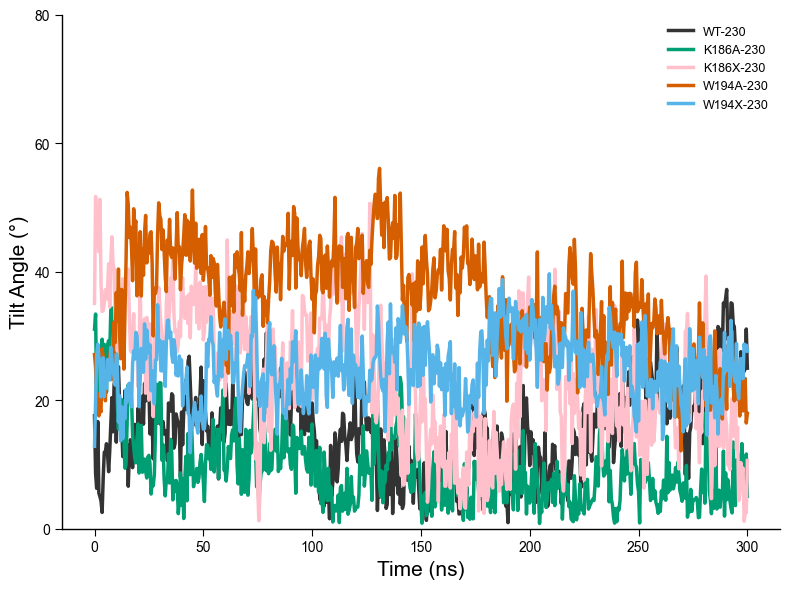

Saved figure to: /Users/k20098771/Data/Figures/TREM2_28to32_tilt_group1.jpeg


In [13]:
plt.figure(figsize=(8,6))
plt.plot(t_wt,   a_wt,   label='WT-230',     color=colors['WT'],   linewidth=2.5)
plt.plot(t_k26a, a_k26a, label='K186A-230',  color=colors['K26A'], linewidth=2.5)
plt.plot(t_k26x, a_k26x, label='K186X-230',  color=colors['K26X'], linewidth=2.5)
plt.plot(t_w34a, a_w34a, label='W194A-230',  color=colors['W34A'], linewidth=2.5)
plt.plot(t_w34x, a_w34x, label='W194X-230',  color=colors['W34X'], linewidth=2.5)

plt.xlabel('Time (ns)', fontsize=15, fontname='Arial')
plt.ylabel('Tilt Angle (°)', fontsize=15, fontname='Arial')
plt.ylim(0, 80)
plt.yticks(np.arange(0, 81, 20))

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(frameon=False, fontsize=9)
plt.tight_layout()

outpath = "/Users/k20098771/Data/Figures/TREM2_28to32_tilt_group1.jpeg"
plt.savefig(outpath, dpi=800, format='JPEG', bbox_inches="tight")
plt.show()
print(f"Saved figure to: {outpath}")